In [100]:
#! /env python

In [101]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Exploration

### Removing commas to make numerical columns of floats data types.

In [102]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')
df.head(6)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27


In [103]:
df_refined = df[['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)']]

df_refined.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [104]:
df_refined.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [105]:
column_group = ['Production (Tons)', 'Production per Person (Kg)', 'Acreage (Hectare)', 'Yield (Kg / Hectare)']
for i in column_group:
    column_list = list(df_refined[i])

    

    for j in range(len(column_list)):
        column_list[j] = str(column_list[j]).replace('.','')
        column_list[j] = column_list[j].replace(',','.')
        column_list[j] = float(column_list[j])
    
    df_refined[i] = pd.Series(column_list)
#print(column_list)

#df_refined['Production (Tons)'] = pd.Series(column_list)
#df_refined['Production (Tons)']

#df_refined['Production (Tons)'] = df_refined['Production (Tons)'].replace('.','')

C:\Users\Saad\AppData\Local\Temp\ipykernel_12424\1414618274.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined[i] = pd.Series(column_list)


In [106]:
#df_refined.head()
df_refined = df_refined.dropna()
print(len(df_refined))

102


In [107]:
df_refined.to_csv('List of Countries by Sugarcane Production Refined.csv')

In [108]:
df_refined.dtypes

Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

KeyError: 99

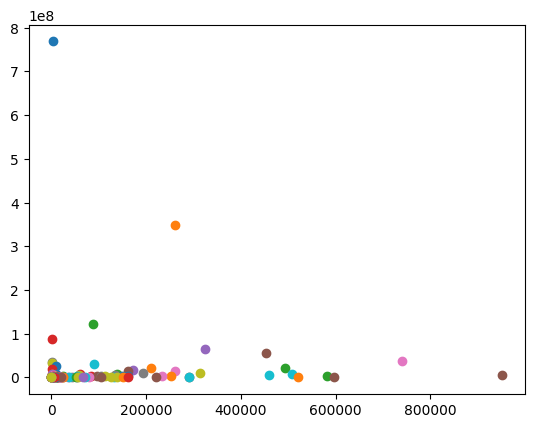

In [109]:
for i in list(range(len(df_refined['Production per Person (Kg)']))):
    plt.scatter(df_refined['Production per Person (Kg)'][i], df_refined['Production (Tons)'][i])
    #plt.text(float(df_refined['Production per Person (Kg)'][i])+0.3, float(df_refined['Production (Tons)'][i])+0.3, s = df_refined['Country'][i])

plt.xlabel('Production per Person (Kg)')
plt.ylabel('Production (Tons)')
plt.show()

KeyError: 99

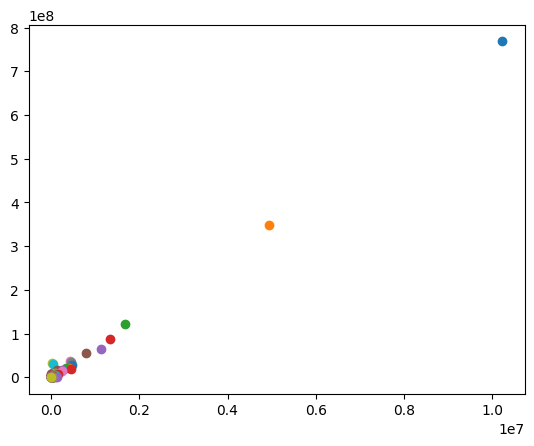

In [110]:
for i in list(range(len(df_refined['Production per Person (Kg)']))):
    plt.scatter(df_refined['Acreage (Hectare)'][i], df_refined['Production (Tons)'][i])
    #plt.text(float(df_refined['Acreage (Hectare)'][i])+0.3, float(df_refined['Production (Tons)'][i])+0.3, s = df_refined['Country'][i])

plt.xlabel('Acreage (Hectare)')
plt.ylabel('Production (Tons)')
plt.show()

- From the graph above it can be seen that the relationship between Production and Acreage is near linear.
i.e., The greater the State's Acreage (land), the greater the production of Production of Sugarcane.
- It can also be noted that majority of the data points lie in the region below 0.2e7 hectares. There are two outliers in this regard which are specifically Brazil and India.
- It is therefore expected the gradient of the linear line that fits this dataset 

In [111]:
list(range(len(df_refined['Production per Person (Kg)'])))
df_refined['Production per Person (Kg)'][0]

3668.531

## Regression Algorithm Dev

Target Feature - "Yield (Kg/Hectares)"
This can be calculated with the simple formula:
$$Yield (Kg/Hectares) = \frac{Production (kg)}{Acreage (Hectare)}$$

Input Features:
- "Production (Tons)"
- "Acreage (Hectare)"

In [129]:
#Extracting the required features.
feature_list = ['Acreage (Hectare)', 'Production (Tons)', 'Yield (Kg / Hectare)']
df_algo = df_refined[feature_list]
df_algo.head()

,Acreage (Hectare),Production (Tons),Yield (Kg / Hectare)
0,10226205.0,768678382.0,75167.5
1,4950000.0,348448000.0,70393.5
2,1675215.0,123059739.0,73459.1
3,1336575.0,87468496.0,65442.2
4,1130820.0,65450704.0,57879.0


## Multiple Linear Regression
- Multiple Inputs.

$$f_{w,b}(x)=w_1x_1+w_2x_2+b$$

Cost Function:
$$J(w,b)= \frac{1}{2m}  \sum_{i=1}^m (f_{w,b}({x}^{(i)})-y^{(i)})^{2}$$

1st Order Derivative:
$$\frac{ \partial }{ \partial b} J(w_i,b_i) = \frac{1}{m}  \sum_{i=1}^m (f_{w,b}({x}^{(i)})-y^{(i)})$$

In [137]:
x = np.array([df_algo['Acreage (Hectare)'], df_algo['Production (Tons)']])
#initialise paramaters
w = np.array([0.01,0.01])
b = 5

#Target Feature
y = list(df_algo['Yield (Kg / Hectare)'])

# length of dataset and total number of input features or columns.
m = int(len(df_algo))
n = int(len(w))
print(m,n,len(y))

102 2 102


In [138]:
def model_multi_input(w, x, b, n):
    f_total = b
    for i in range(0,n):
        f_i_j = w[i]*x[i]
        f_total += f_i_j
    
    return f_total

def single_model_multi_input(w, x_i, b, n):
    f__single_total = b
    for i in range(0,n):
        f_single_total += w[i]*x[i]
    
    return f_single_total

def cost_func(x, w, b, m, n, y):
    f_total = model_multi_input(x,w,b,n)
    #print(f_total)
    #print(len(f_total))
    J_total = 0
    for i in range(0,m):
        squared_diff = (f_total[i] - y[i])**2
        #print(squared_diff)
        J_total += squared_diff
        #print(J_total)
    
    #print(J_total)
    J_total = J_total*(1/(2*m))
    #print(J_total)
    return J_total

In [139]:
#inst = model_multi_input(w, x, b, n)
#print(inst, len(inst))
j_temp = cost_func(x, w, b, m, n, y)
print(j_temp)

366600278359.8512
